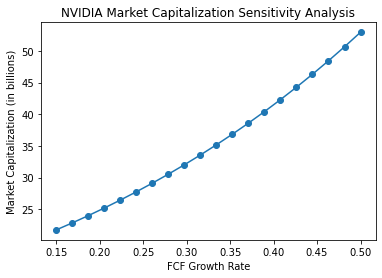

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# FCF Data
fcf_data = pd.DataFrame({
    'Year': [2018, 2019, 2020, 2021, 2022, 2023],
    'FCF': [2.9, 3.14, 4.27, 4.69, 8.13, 3.8]
})
# Define the latest year and previous year based on the provided FCF data
latest_year = fcf_data['Year'].max()
previous_year = latest_year - 1

# Scenarios for FCF growth rates
fcf_growth_scenarios = np.linspace(0.15, 0.5, 20)

# Discount rate for DCF
discount_rate = 0.1

# Prepare a grid to store the valuation results
valuation_grid = np.zeros(len(fcf_growth_scenarios))

# Get the current FCF
fcf_current = fcf_data.loc[fcf_data['Year'] == latest_year, 'FCF'].values[0]

for i, growth in enumerate(fcf_growth_scenarios):
    # 2-step DCF calculation
    future_fcf = [fcf_current * (1 + growth) ** t for t in range(1, 6)]

    present_value = [fcf / (1 + discount_rate) ** t for t, fcf in enumerate(future_fcf, start=1)]


    market_cap = np.sum(present_value)

    valuation_grid[i] = market_cap

# Plotting the results using a line plot
fig, ax = plt.subplots()
ax.plot(fcf_growth_scenarios, valuation_grid, marker='o', linestyle='-')
ax.set_title('NVIDIA Market Capitalization Sensitivity Analysis')
ax.set_xlabel('FCF Growth Rate')
ax.set_ylabel('Market Capitalization (in billions)')
plt.show()
